In [ ]:
 import pandas as pd

In [ ]:
data=pd.read_excel('data anticorps.xlsx')

In [ ]:
data

,individu,jour,MDA FLUNPS,MDA FLUH9S
0,individu 1,1,11649,18811
1,individu 1,7,5006,12107
2,individu 1,14,5006,7452
3,individu 1,21,3174,2640
4,individu 1,28,2775,1038
...,...,...,...,...
135,individu 20,14,127,300
136,individu 20,21,478,151
137,individu 20,28,136,52
138,individu 20,35,40,1


In [ ]:
print(data.columns)

Index(['individu ', 'jour', 'MDA FLUNPS', 'MDA FLUH9S'], dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

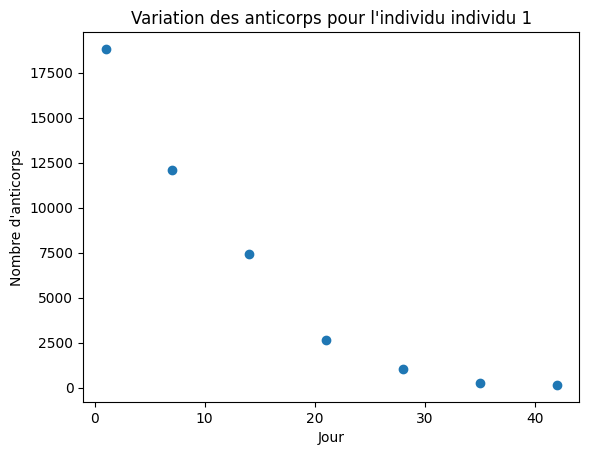

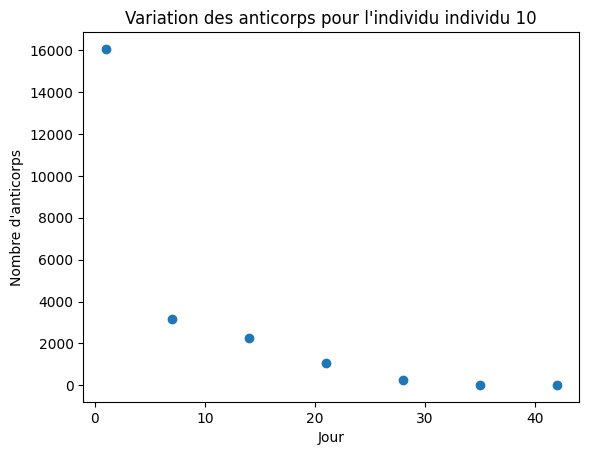

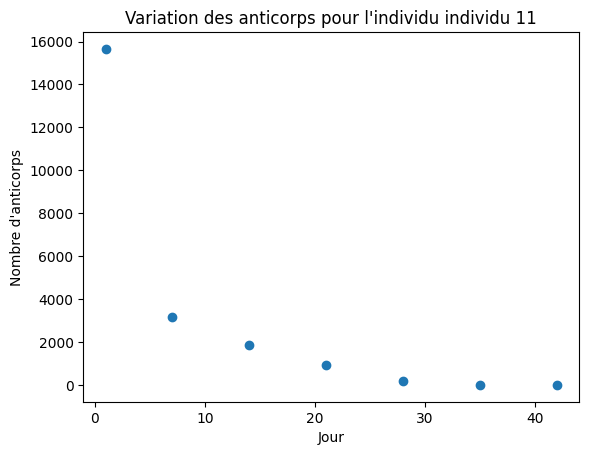

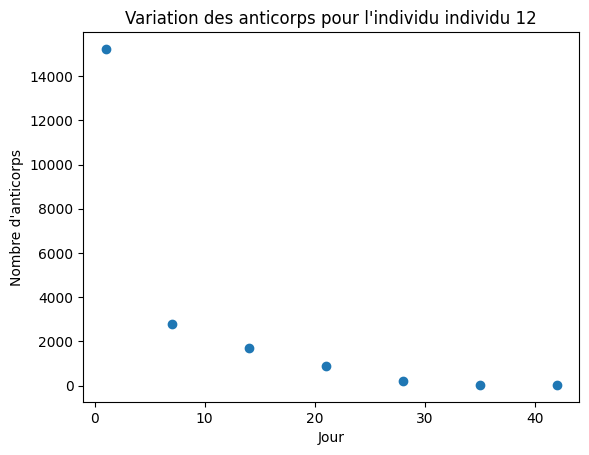

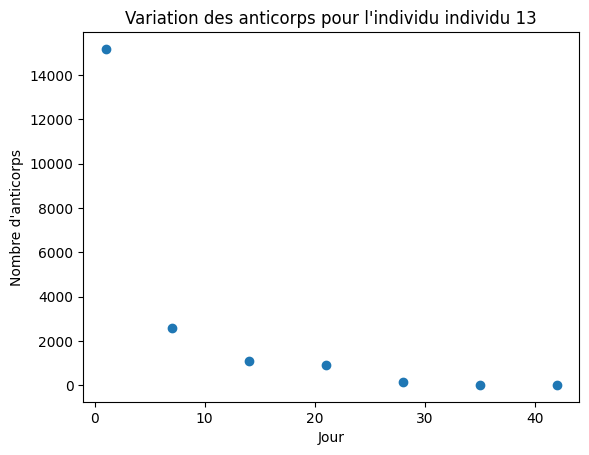

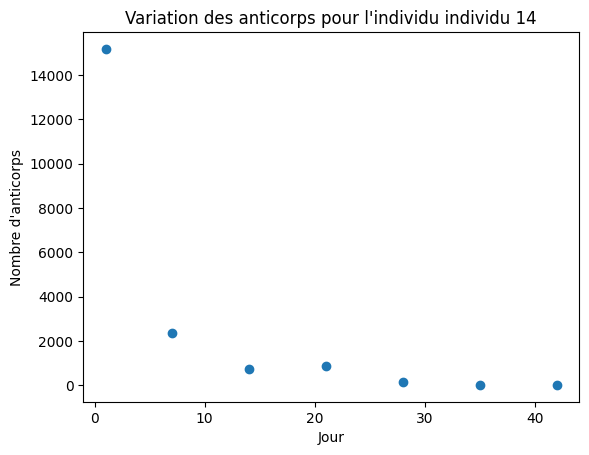

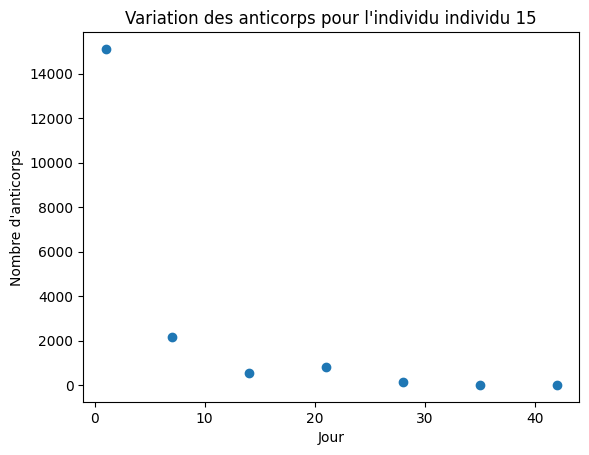

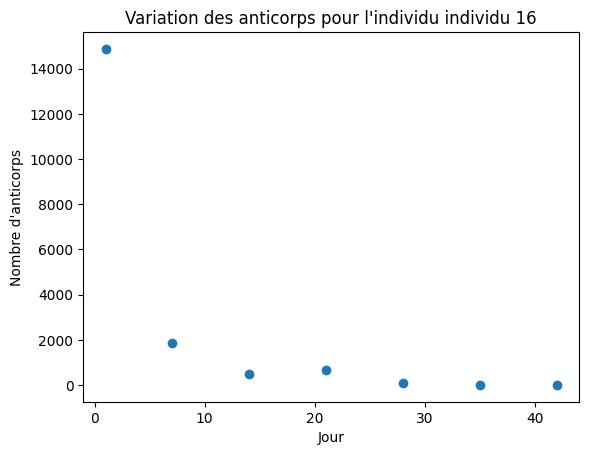

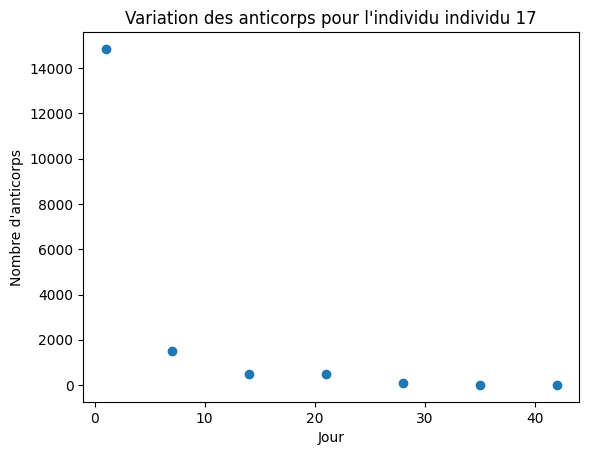

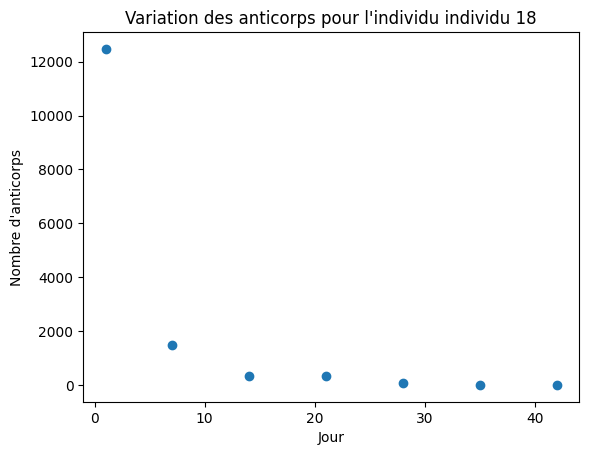

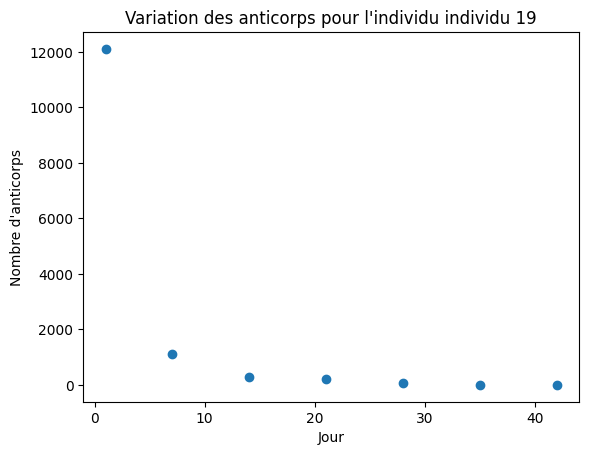

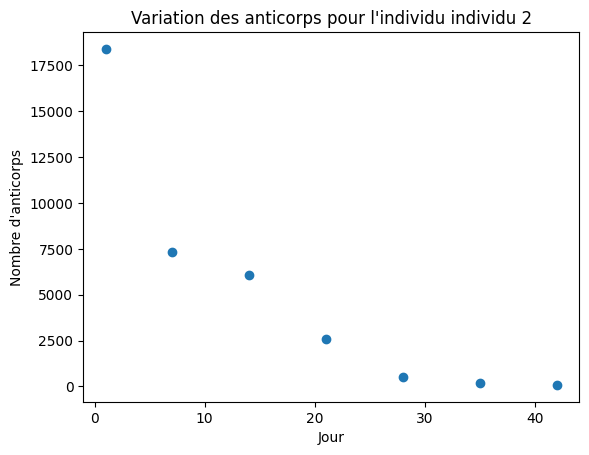

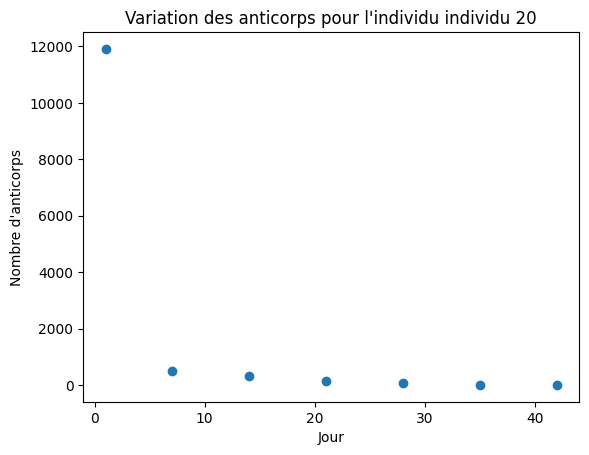

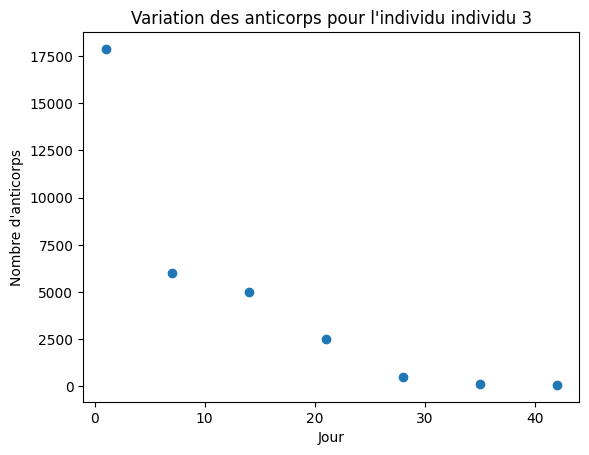

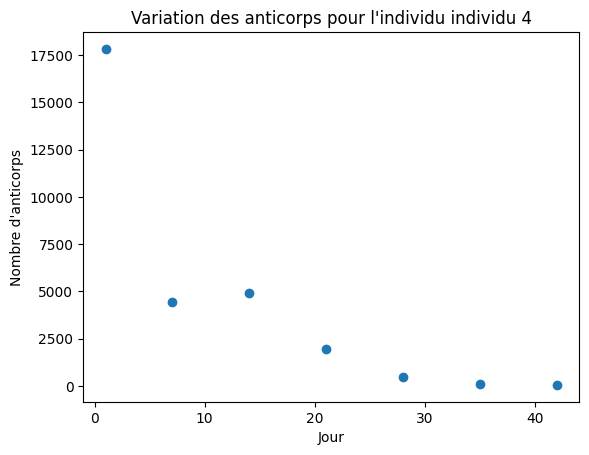

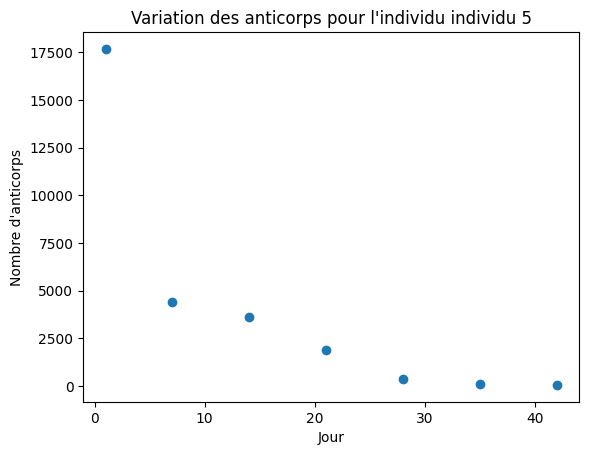

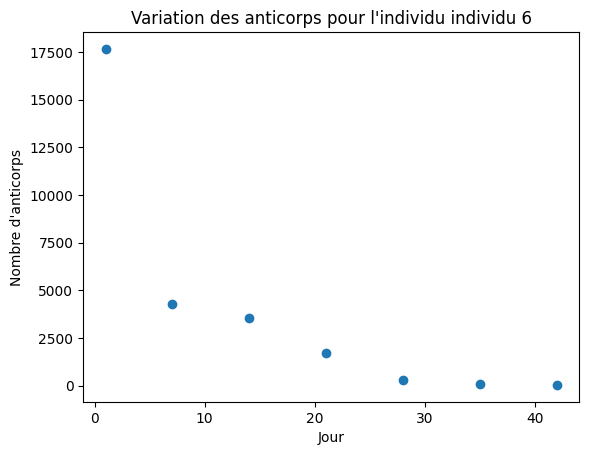

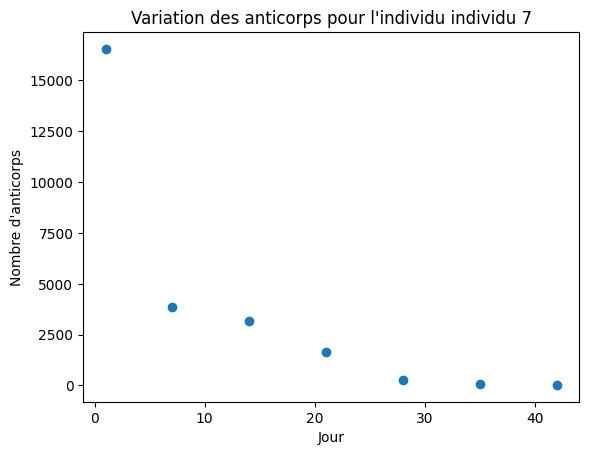

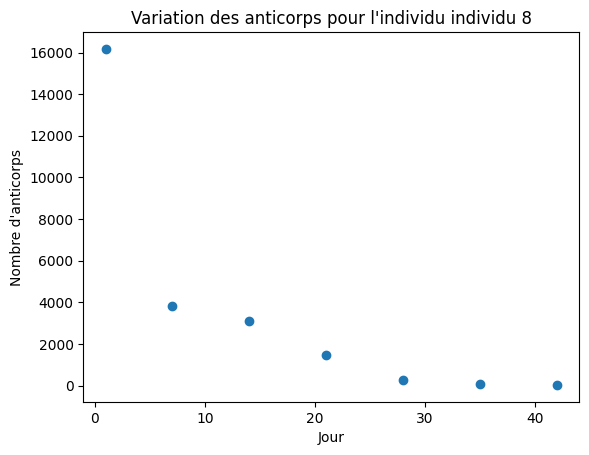

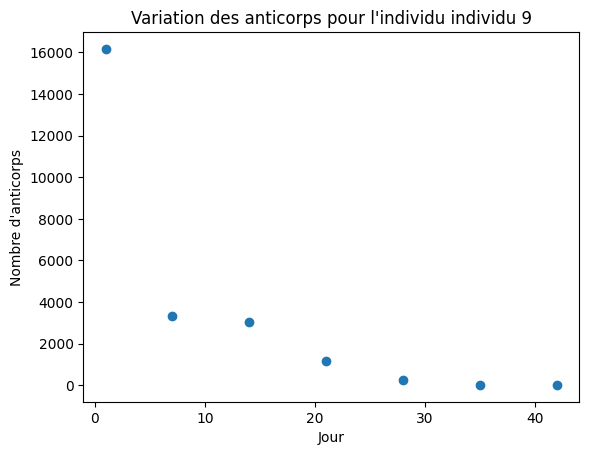

In [ ]:
groupes = data.groupby("individu ")
for nom, groupe in groupes:
    # Création d'un graphique en nuage de points (scatter plot) pour le groupe d'individus
    plt.scatter(groupe["jour"], groupe["MDA FLUH9S"])

    # Ajout des labels d'axes et du titre pour chaque graphique
    plt.xlabel("Jour")
    plt.ylabel("Nombre d'anticorps")
    plt.title("Variation des anticorps pour l'individu {}".format(nom))

    # Affichage du graphique pour chaque groupe
    plt.show()

In [ ]:
groupes = data.groupby('jour')
moyennes = groupes.mean()['MDA FLUH9S']
moyennes_liste1 = moyennes.tolist()
print(moyennes_liste1)

[15788.05, 3615.85, 2501.45, 1245.5, 267.85, 61.15, 32.0]


<ipython-input-117-1711636ab163>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
groupes = data.groupby('jour')
moyennes = groupes.mean()['MDA FLUNPS']
moyennes_liste = moyennes.tolist()
print(moyennes_liste)

[10836.2, 2243.8, 1309.85, 1307.85, 494.75, 180.75, 124.95]


<ipython-input-118-6788fa8fd5ce>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
L=data['jour'].tolist()
F=[]
for element in L:
  if element not in F:
    F.append(element)

print(F)

[1, 7, 14, 21, 28, 35, 42]


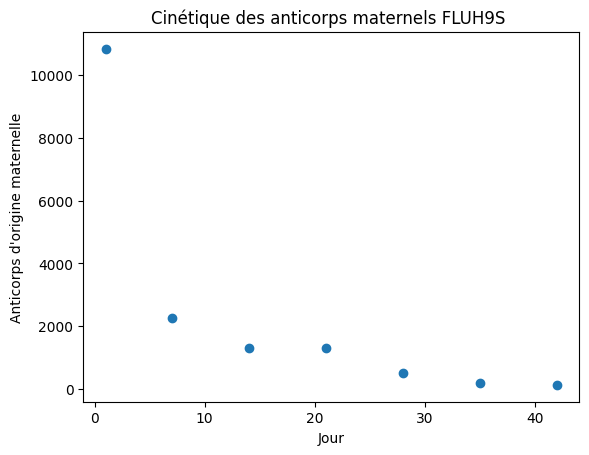

In [ ]:


# Dessiner le scatterplot
plt.scatter(F, moyennes_liste)
plt.xlabel("Jour")
plt.ylabel("Anticorps d'origine maternelle")
plt.title("Cinétique des anticorps maternels FLUH9S ")
plt.show()

<ipython-input-121-4ba5bb19189c>:5: RuntimeWarning:

overflow encountered in exp



A_0 = 13625.854108515605 , k = 0.28738947672854714 , c = 595.9708455273094


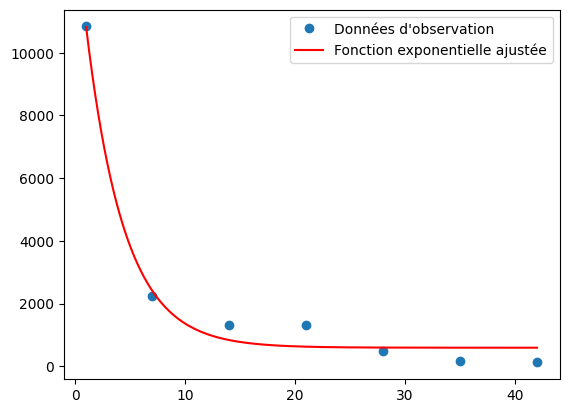

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
# Définir la fonction exponentielle
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Entrer les données d'observation
x_data = F
x_plot =np.linspace(x_data[0],x_data[-1],150)
y_data = moyennes_liste # Niveau d'anticorps observé


# Utiliser la méthode des moindres carrés pour ajuster la courbe
popt, pcov = curve_fit(exp_func, x_data, y_data)
popt = np.asarray(popt, dtype=np.float64)
x_data = np.asarray(x_data, dtype=np.float64)
y_data = np.asarray(y_data, dtype=np.float64)
# Afficher les paramètres a, b et c de la fonction ajustée
print('A_0 =', popt[0], ', k =', popt[1], ', c =', popt[2])

# Plot des données d'observation et de la fonction ajustée
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'o', label='Données d\'observation')
plt.plot(x_plot, exp_func(x_plot, *popt), 'r-', label='Fonction exponentielle ajustée')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calculer les valeurs prédites de l'équation pour les données d'entrée x
y_pred = exp_func(x_data, *popt)
# Calculer le coefficient de détermination (R²)
r2 = r2_score(y_data, y_pred)
print("R² =", r2)

R² = 0.9871785033227066


a = 19235.81138992403 , b = 0.2381746628212005 , c = 553.8381411975748


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

overflow encountered in exp



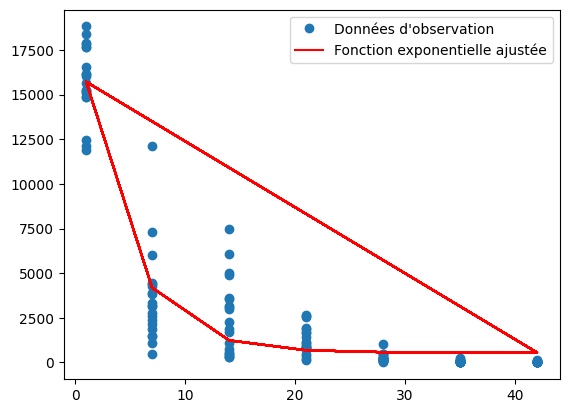

In [ ]:

# Définir la fonction exponentielle
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Entrer les données d'observation
x_data = data['jour']
y_data = data['MDA FLUH9S'] # Niveau d'anticorps observé

# Utiliser la méthode des moindres carrés pour ajuster la courbe
popt, pcov = curve_fit(exp_func, x_data, y_data)

# Afficher les paramètres a, b et c de la fonction ajustée
print('a =', popt[0], ', b =', popt[1], ', c =', popt[2])

# Plot des données d'observation et de la fonction ajustée
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'o', label='Données d\'observation')
plt.plot(x_data, exp_func(x_data, *popt), 'r-', label='Fonction exponentielle ajustée')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
df=pd.read_excel('data_vaccin.xlsx')

In [ ]:
df

,lot,jour_vaccin,jour,MDA
0,1,5j_7j,1,9355
1,1,5j_7j,7,5115
2,1,5j_7j,14,1378
3,1,5j_7j,21,312
4,1,5j_7j,28,878
5,1,5j_7j,35,1146
6,2,5j_7j,1,13910
7,2,5j_7j,7,12537
8,2,5j_7j,14,6723
9,2,5j_7j,21,909


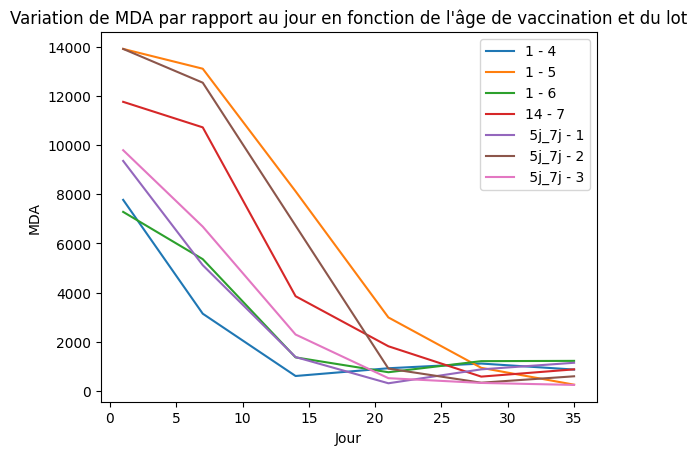

In [ ]:
# Grouper les données par âge de vaccination
groupes_v = df.groupby(["jour_vaccin", "lot "])

# Parcourir les groupes et dessiner les courbes
for (age, lot), groupe in groupes_v:
       plt.plot(groupe["jour"], groupe["MDA "], label=f"{age} - {lot}")
plt.legend()
plt.xlabel("Jour")
plt.ylabel("MDA")
plt.title("Variation de MDA par rapport au jour en fonction de l'âge de vaccination et du lot")
 # Afficher le graphique
plt.show()



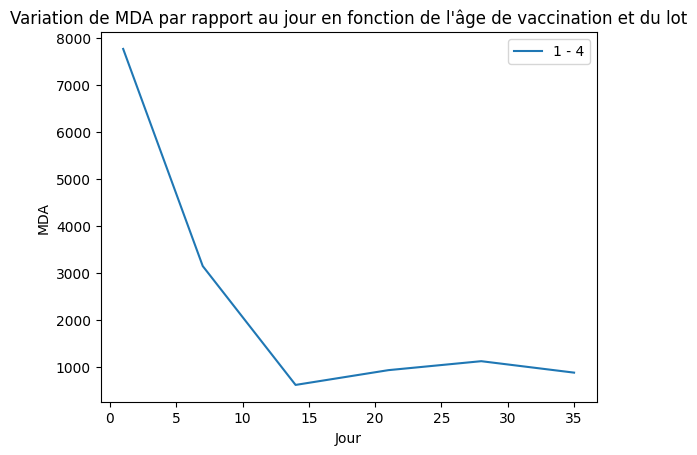

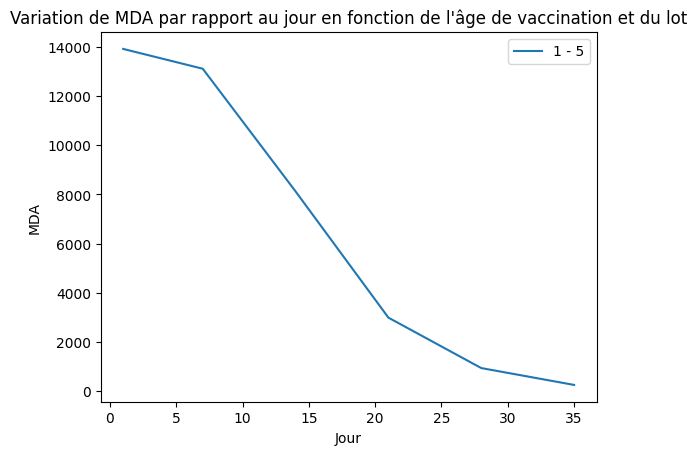

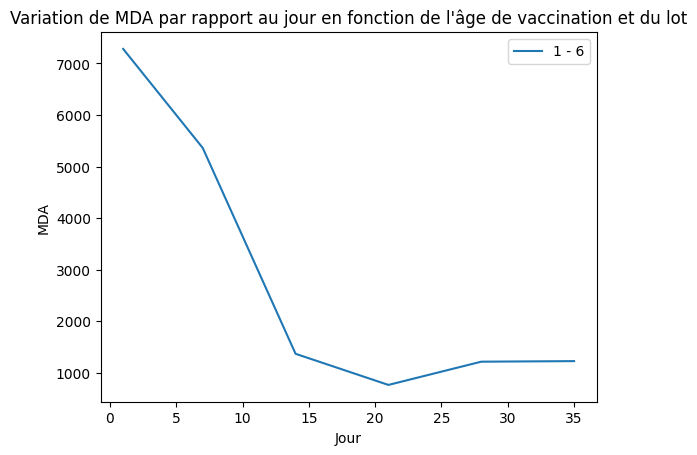

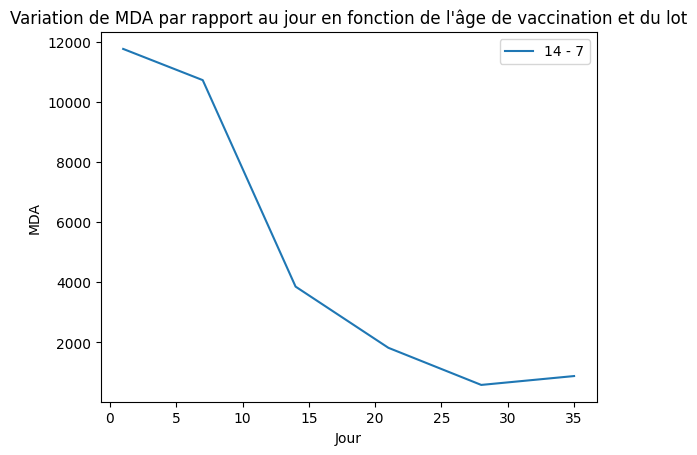

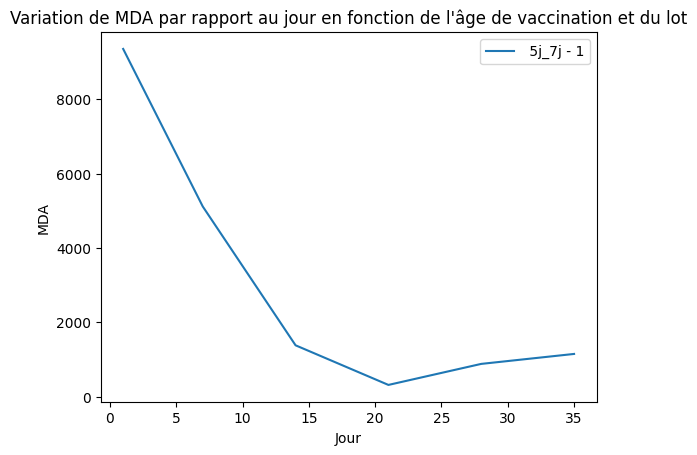

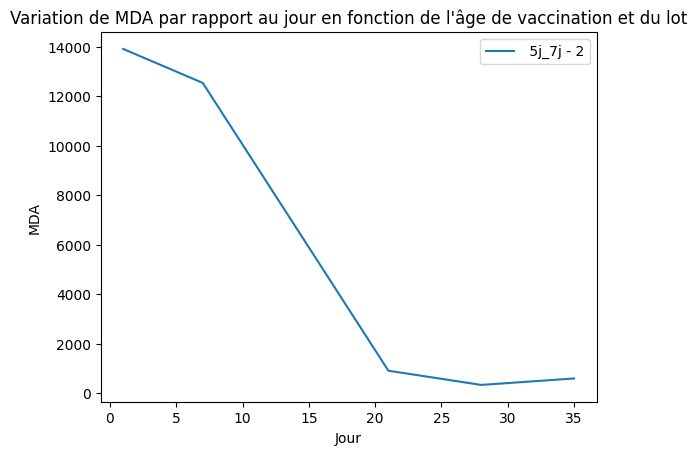

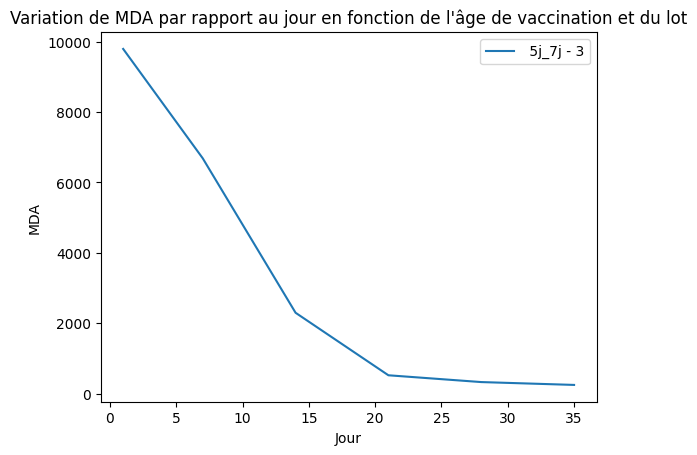

In [ ]:
# Grouper les données par âge de vaccination
groupes_v = df.groupby(["jour_vaccin", "lot "])

# Parcourir les groupes et dessiner les courbes
for (age, lot), groupe in groupes_v:
       plt.plot(groupe["jour"], groupe["MDA "], label=f"{age} - {lot}")
       plt.legend()
       plt.xlabel("Jour")
       plt.ylabel("MDA")
       plt.title("Variation de MDA par rapport au jour en fonction de l'âge de vaccination et du lot")
 # Afficher le graphique
       plt.show()

<ipython-input-128-0c7ce210701d>:6: RuntimeWarning:

overflow encountered in exp



A_0 = 19235.811483978792 , k = 0.23817466954379318 , c = 553.838193677667


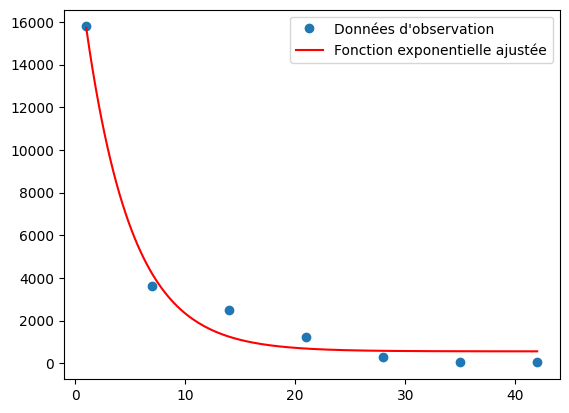

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Définir la fonction exponentielle
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Entrer les données d'observation
x_data =F # Temps en semaines
x_plot =np.linspace(x_data[0],x_data[-1],150)
y_data = moyennes_liste1 # Niveau d'anticorps observé


# Utiliser la méthode des moindres carrés pour ajuster la courbe
popt, pcov = curve_fit(exp_func, x_data, y_data)
popt = np.asarray(popt, dtype=np.float64)
x_data = np.asarray(x_data, dtype=np.float64)
y_data = np.asarray(y_data, dtype=np.float64)
# Afficher les paramètres a, b et c de la fonction ajustée
print('A_0 =', popt[0], ', k =', popt[1], ', c =', popt[2])

# Plot des données d'observation et de la fonction ajustée
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'o', label='Données d\'observation')
plt.plot(x_plot, exp_func(x_plot, *popt), 'r-', label='Fonction exponentielle ajustée')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calculer les valeurs prédites de l'équation pour les données d'entrée x
y_pred = exp_func(x_data, *popt)
# Calculer le coefficient de détermination (R²)
r2 = r2_score(y_data, y_pred)
print("R² =", r2)

R² = 0.9850684958774125


In [ ]:
# Remplacer toutes les instances de "5J_7j" par 7 dans la colonne "jour_vaccinatio"
for i in range(len(df)):
    # Si la valeur dans la colonne 'jour_vaccinatio' est '5J_7j'
    if df.loc[i, 'jour_vaccin'] == ' 5j_7j':
        # Modifier la valeur de cette cellule à 7
        df.loc[i, 'jour_vaccin'] = 7

In [ ]:
df

,lot,jour_vaccin,jour,MDA
0,1,7,1,9355
1,1,7,7,5115
2,1,7,14,1378
3,1,7,21,312
4,1,7,28,878
5,1,7,35,1146
6,2,7,1,13910
7,2,7,7,12537
8,2,7,14,6723
9,2,7,21,909


In [ ]:
df['jour'] = df['jour'].astype(int)
df['jour_vaccin'] = df['jour_vaccin'].astype(int)

In [ ]:
df['MDA '] = df.apply(lambda x: 0 if x['jour'] <  x['jour_vaccin']+14 else x['MDA '], axis=1)

In [ ]:
df

,lot,jour_vaccin,jour,MDA
0,1,7,1,0
1,1,7,7,0
2,1,7,14,0
3,1,7,21,312
4,1,7,28,878
5,1,7,35,1146
6,2,7,1,0
7,2,7,7,0
8,2,7,14,0
9,2,7,21,909


In [ ]:
# Grouper les données par lot
grouped = df.groupby('lot ')

# Initialiser la liste qui contiendra les lots dont les MDA sont croissantes
lots_croissants = []

# Boucler sur chaque groupe
for name, group in grouped:
    # Obtenir le jour de vaccination
    jour_vaccin = group['jour_vaccin'].iloc[0]

    # Obtenir les données après jour_vaccin+14
    after_vaccin = group[group['jour'] > jour_vaccin + 14]

    # Vérifier si les MDA sont croissantes
    if after_vaccin['MDA '].is_monotonic_increasing:
        # Si oui, ajouter le groupe entier à la liste des lots croissants
        lots_croissants.append(group)

# Concaténer tous les groupes croissants en une seule DataFrame
data_reponse = pd.concat(lots_croissants, ignore_index=True)

In [ ]:
data_reponse

,lot,jour_vaccin,jour,MDA
0,1,7,1,0
1,1,7,7,0
2,1,7,14,0
3,1,7,21,312
4,1,7,28,878
5,1,7,35,1146
6,2,7,1,0
7,2,7,7,0
8,2,7,14,0
9,2,7,21,909


In [ ]:
moyennes_par_jour = data_reponse.groupby('jour')['MDA '].mean()
liste_moyennes = moyennes_par_jour.tolist()
liste_moyennes

[0.0, 0.0, 0.0, 495.5, 752.0, 960.75]

In [ ]:

#liste_moyennes =[0.0, 0.0, 0.0, 495.5, 752.0, 960.75]



A_0 = 107.94604781215682 , k = 1.0000000000000204 , c = 470.3723607087618


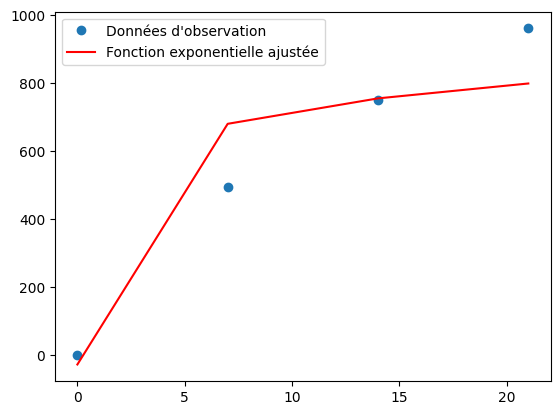

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import scipy
# Définir la fonction exponentielle
def exp_func(x, a, k, c):
    return a * np.exp( k * x) + c

def log_func(x,a,k,c):

   return  a* np.log( x) +c

# Entrer les données d'observation
x_data =np.arange(0,22,7)+0.01   # Temps en semaines
y_data = np.array(liste_moyennes[2:] )# Niveau d'anticorps observé

# Utiliser la méthode des moindres carrés pour ajuster la courbe
#popt, pcov = curve_fit(exp_func, x_data, y_data)

popt, pcov = curve_fit(log_func, x_data  , y_data,bounds=(0,np.inf))
popt = np.asarray(popt, dtype=np.float64)

x_data = np.asarray(x_data, dtype=np.float64)
y_data = np.asarray(y_data, dtype=np.float64)
# Afficher les paramètres a, b et c de la fonction ajustée
print('A_0 =', popt[0], ', k =', popt[1], ', c =', popt[2])

# Plot des données d'observation et de la fonction ajustée
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'o', label='Données d\'observation')
plt.plot(x_data, log_func(x_data, *popt), 'r-', label='Fonction exponentielle ajustée')
plt.legend()
plt.show()

In [ ]:
A_01= 13625
k_1 = 0.28738947824622907
c_1 = 595.9708514827894
A_0_vaccin=popt[0]

k1=popt[1]
c_vaccin=popt[2]

In [ ]:
import numpy as np
from scipy.optimize import minimize
from random import randint
latence=14
x=randint(1,10)
if x<4: latence+= randint(-1, 1)
# Modélisation de la diminution des anticorps maternels
def A(t,age_vaccin ,A_0, k, c):
  z=age_vaccin+latence
  if t<=z:
    return A_0 * np.exp(-k * t) + c
  else:
    return 0

# Modélisation de la réponse immunitaire au vaccin
def Y(t,age_vaccin, A_0_vaccin, k1, c_vaccin):
  z=age_vaccin+latence
  if t> z:
     #return (A_0_vaccin * np.exp(k1 * (t-z) )+ c_vaccin)

     return  log_func(t-z, A_0_vaccin, k1, c_vaccin )
  else :
    return 0

def fonction_objective(age, age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin):
    # Quantité d'anticorps maternels restants au moment de la vaccination
    A_residual = A(age,age_vaccin, A_0, k, c)

    # Réponse immunitaire au vaccin
    Y_vaccin = Y(age,age_vaccin, A_0_vaccin, k1, c_vaccin)

    return    Y_vaccin + A_residual

#print(fonction_objective(35,10, A_0, k, c, A_0_vaccin, k1, c_vaccin))

def f(age_vaccin) :
  #LA VALEUR MAX à LA FIN DE BANDE INDIQUE UNE MEILLEUR REPONSE
   return   - fonction_objective(35,age_vaccin, A_01, k_1, c_1, A_0_vaccin, k1, c_vaccin)

  # la somme de bande maximale  est la meilleur
  #L=[ fonction_objective(J ,age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin) for J in range (21,34) ]

  #return -sum (L)/14


# Contrainte sur l'âge maximal
def constraint(age):
    return age - 21
constraint1 =scipy.optimize.NonlinearConstraint(f,-np.inf,-50)

def age_optimal(f,x0 ):
    bounds = [(14, 21)] # Bornes de l'âge (entre 14 et 21 jours)
    constraints = [{'type': 'ineq', 'fun': constraint }, constraint1 ] # Contrainte sur l'âge maximal
    result = minimize(f,x0,bounds=bounds , constraints=constraints)
    optimal_age = result.x[0]
    return optimal_age

age_opt=round(age_optimal(f,10))


print(fonction_objective(35,age_opt, A_01, k_1, c_1, A_0_vaccin, k1, c_vaccin))
L=[ fonction_objective(J,age_opt, A_01, k_1, c_1, A_0_vaccin, k1, c_vaccin) for J in range (10,45) ]
print(L)
print(age_opt,-f(age_opt))


596.5542002056193
[1365.4907693171376, 1173.2796823675912, 1029.0791810963215, 920.8971563396346, 839.7368942234847, 778.8488847637158, 733.1695141048668, 698.8999605047086, 673.1902738996762, 653.9023662414354, 639.4322022309568, 628.5764033438915, 620.4321715721528, 614.32221026559, 609.738398285037, 606.2995332548294, 603.7196297277746, 601.7841358510323, 600.3320906456121, 599.2427380499155, 598.4254845144737, 597.8123649939159, 597.3523907873976, 597.0073091783996, 596.748422233912, 596.5542002056193, 470.3723607087618, 545.1948594023473, 588.9632153483526, 620.0173580959329, 644.104822555071, 663.7857140419381, 680.4256706968479, 694.8398567895184, 707.5540699879434]
21 596.5542002056193


In [ ]:
#a_0=13625.854121665714 , k1 = 0.28738947824622907 , c1 = 595.9708514827894
A_0 = 13625
k = 0.28738947824622907
c = 595.9708514827894
A_0_vaccin=popt[0]

k1=popt[1]
c_vaccin=popt[2]

In [ ]:
import numpy as np
from scipy.optimize import minimize
from random import randint
latence=14
x=randint(1,10)
if x<4: latence+= randint(-1, 1)
# Modélisation de la diminution des anticorps maternels
def A(t,age_vaccin ,A_0, k, c):
  z=age_vaccin+latence
  if t<z:
    return A_0 * np.exp(-k * t) + c
  else:
    return 0

# Modélisation de la réponse immunitaire au vaccin
def Y(t,age_vaccin, A_0_vaccin, k1, c_vaccin):
  z=age_vaccin+latence
  if t> z:
     #return (A_0_vaccin * np.exp(k1 * (t-z) )+ c_vaccin)

     return  log_func(t-z, A_0_vaccin, k1, c_vaccin )
  else :
    return 0

def fonction_objective(age, age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin):
    # Quantité d'anticorps maternels restants au moment de la vaccination
    A_residual = A(age,age_vaccin, A_0, k, c)

    # Réponse immunitaire au vaccin
    Y_vaccin = Y(age,age_vaccin, A_0_vaccin, k1, c_vaccin)
    #print(Y_vaccin)

    # Fonction objectif : somme pondérée de la réponse immunitaire et des anticorps maternels résiduels

    return    Y_vaccin + A_residual
#print(fonction_objective(35,10, A_0, k, c, A_0_vaccin, k1, c_vaccin))

def f(age_vaccin) :
  #LA VALEUR MAX à LA FIN DE BANDE INDIQUE UNE MEILLEUR REPONSE
   return   fonction_objective(35,age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin)
  # la somme de bande maximale  est la meilleur
  #L=[ fonction_objective(J ,age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin) for J in range (21,34) ]

  #return -sum (L)/14


# Contrainte sur l'âge maximal
def constraint(age):
    return age - 21
constraint1 =scipy.optimize.NonlinearConstraint(f,-np.inf,-50)

def age_optimal(f,x0 ):
    #x0 = 10 # Valeur initiale de l'âge
    bounds = [(x0, 21)] # Bornes de l'âge (entre 0 et 21 jours)
    constraints = [{'type': 'ineq', 'fun': constraint }, constraint1 ] # Contrainte sur l'âge maximal
    result = minimize(f, x0,bounds=bounds , constraints=constraints)
    optimal_age = result.x[0]
    #if optimal_age > 21: # Vérification de la contrainte sur l'âge maximal
        #optimal_age = 21


    return optimal_age

print(round(age_optimal(f,14)))
#print(f(20))

#print(f(45))
#L=[ f(J ) for J in range (10,22) ]
#print(L)
print(f(20))

21
470.3723607087618


On peut definir la fonction objective avec la manière suivante

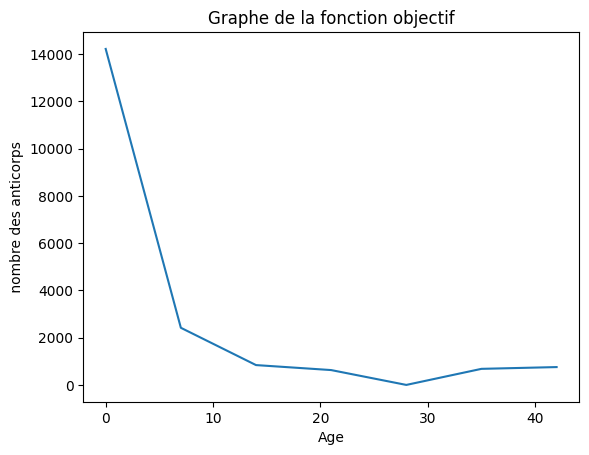

In [ ]:
import matplotlib.pyplot as plt
# Exemple d'utilisation
#A_0_vaccin = 438.286804493693
#k1 = 0.03610264331501692
#c_vaccin = 0 #-537.9293002684425
#A_0 = 17000
#k = 0.23836817570438462
#c = 552.2029360521324
N=45
# Définition des âges des prélèvements
ages =list(range(0,N,7)) #[1, 7, 14, 21, 28, 35]
# Âge de vaccination
age_vaccin = 14
# Calcul des valeurs de la fonction objectif pour chaque âge
objectives = [fonction_objective(age, age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin) for age in ages]

# Tracé du graphe de la fonction objectif
plt.plot(ages, objectives)
plt.xlabel("Age")
plt.ylabel(" nombre des anticorps ")
plt.title("Graphe de la fonction objectif")
plt.show()

#print(fonction_objective(45,age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin))


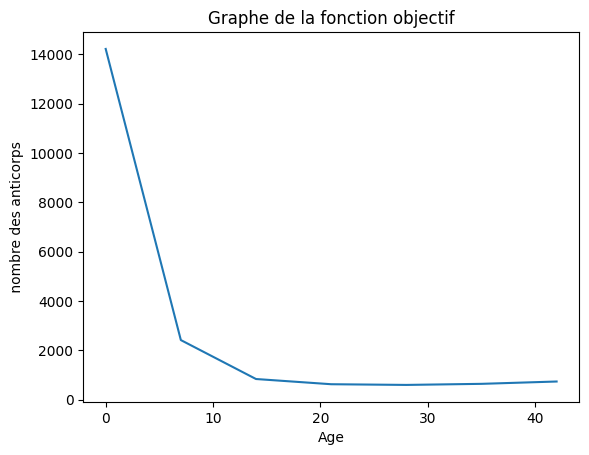

In [ ]:

# Définition des âges des prélèvements
ages =list(range(0,N,7)) #[1, 7, 14, 21, 28, 35]
# Âge de vaccination
age_vaccin = 16
# Calcul des valeurs de la fonction objectif pour chaque âge
objectives = [fonction_objective(age, age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin) for age in ages]

# Tracé du graphe de la fonction objectif
plt.plot(ages, objectives)
plt.xlabel("Age")
plt.ylabel(" nombre des anticorps ")
plt.title("Graphe de la fonction objectif")
plt.show()


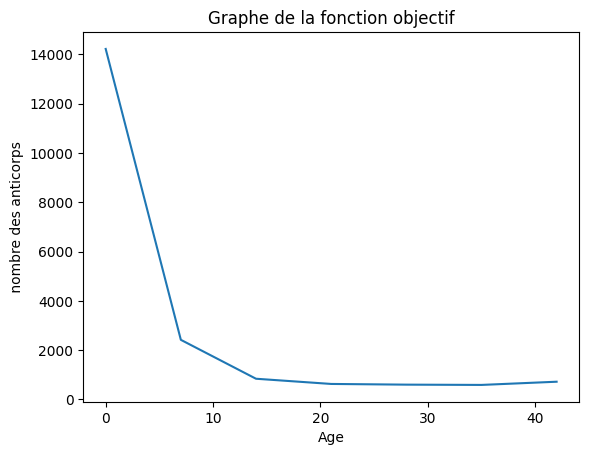

673.1902738996762


In [ ]:

# Définition des âges des prélèvements
ages =list(range(0,N,7)) #[1, 7, 14, 21, 28, 35]
# Âge de vaccination
age_vaccin = 18
# Calcul des valeurs de la fonction objectif pour chaque âge
objectives = [fonction_objective(age, age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin) for age in ages]

# Tracé du graphe de la fonction objectif
plt.plot(ages, objectives)
plt.xlabel("Age")
plt.ylabel(" nombre des anticorps ")
plt.title("Graphe de la fonction objectif")
plt.show()
print(fonction_objective(18,age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin))

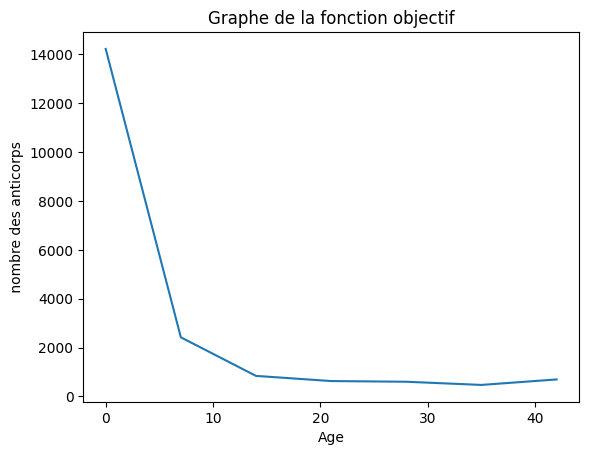

639.4322022309568


In [ ]:

# Définition des âges des prélèvements
ages =list(range(0,N,7)) #[1, 7, 14, 21, 28, 35]
# Âge de vaccination
age_vaccin = 20
# Calcul des valeurs de la fonction objectif pour chaque âge
objectives = [fonction_objective(age, age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin) for age in ages]

# Tracé du graphe de la fonction objectif
plt.plot(ages, objectives)
plt.xlabel("Age")
plt.ylabel(" nombre des anticorps ")
plt.title("Graphe de la fonction objectif")
plt.show()

print(fonction_objective(20,age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin))

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo
N=45
# Définition des âges des prélèvements
ages =list(range(0,N,7)) #[1, 7, 14, 21, 28, 35]

# Âge de vaccination
age_vaccin = 14

# Calcul des valeurs de la fonction objectif pour chaque âge
objectives = [fonction_objective(age, age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin) for age in ages]

# Création de la figure
fig = go.Figure()

# Ajout des données au graphique
fig.add_trace(go.Scatter(x=ages, y=objectives, mode='lines+markers', name='Fonction objective'))

# Ajout d'un curseur pour afficher la valeur de la fonction objectif
fig.update_layout(
    title='Graphe de la fonction objective',
    xaxis_title='Age',
    yaxis_title='Nombre d\'anticorps',
    hovermode='x',
    xaxis=dict(
        showspikes=True,
        spikemode='toaxis+across',
        spikedash='dot',
        spikecolor='black',
        spikethickness=1
    ),
    yaxis=dict(
        showspikes=True,
        spikemode='toaxis+across',
        spikedash='dot',
        spikecolor='black',
        spikethickness=1
    )
)

# Affichage de la figure
pyo.iplot(fig)

In [ ]:
# Âge de vaccination
age_vaccin = 18

# Calcul des valeurs de la fonction objectif pour chaque âge
objectives = [fonction_objective(age, age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin) for age in ages]

# Création de la figure
fig = go.Figure()

# Ajout des données au graphique
fig.add_trace(go.Scatter(x=ages, y=objectives, mode='lines+markers', name='Fonction objective'))

# Ajout d'un curseur pour afficher la valeur de la fonction objectif
fig.update_layout(
    title='Graphe de la fonction objective',
    xaxis_title='Age',
    yaxis_title='Nombre d\'anticorps',
    hovermode='x',
    xaxis=dict(
        showspikes=True,
        spikemode='toaxis+across',
        spikedash='dot',
        spikecolor='black',
        spikethickness=1
    ),
    yaxis=dict(
        showspikes=True,
        spikemode='toaxis+across',
        spikedash='dot',
        spikecolor='black',
        spikethickness=1
    )
)

# Affichage de la figure
pyo.iplot(fig)

In [ ]:


# Âge de vaccination
age_vaccin = 21

# Calcul des valeurs de la fonction objectif pour chaque âge
objectives = [fonction_objective(age, age_vaccin, A_0, k, c, A_0_vaccin, k1, c_vaccin) for age in ages]

# Création de la figure
fig = go.Figure()

# Ajout des données au graphique
fig.add_trace(go.Scatter(x=ages, y=objectives, mode='lines+markers', name='Fonction objective'))

# Ajout d'un curseur pour afficher la valeur de la fonction objectif
fig.update_layout(
    title='objective function fraph',
    xaxis_title='Age',
    yaxis_title='Nombre d\'anticorps',
    hovermode='x',
    xaxis=dict(
        showspikes=True,
        spikemode='toaxis+across',
        spikedash='dot',
        spikecolor='black',
        spikethickness=1
    ),
    yaxis=dict(
        showspikes=True,
        spikemode='toaxis+across',
        spikedash='dot',
        spikecolor='black',
        spikethickness=1
    )
)

# Affichage de la figure
pyo.iplot(fig)